# Importing required libraries

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [122]:
df = pd.read_csv(f'/Users/subhasish/Documents/iNeuron/Industry_ready/Student_Performance_Indicator/Data/student_data.csv')

In [123]:
df.shape

(1000, 8)

In [124]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dataset Information 

In [125]:
cols = df.columns
for col in cols:
    print(f'Categories in {col} Variable : {df[col].unique()}')

Categories in gender Variable : ['female' 'male']
Categories in race_ethnicity Variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education Variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch Variable : ['standard' 'free/reduced']
Categories in test_preparation_course Variable : ['none' 'completed']
Categories in math_score Variable : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading_score Variable : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  4

* Gender (Sex of students) : Male /  Female
* race/ethnicity of students : Group A/B/C/D/E
* Parental level of education : Bachelor / Masters /  associate's degree, "some college" high school 
* Lunch (Having lunch before test) :  Standard, Free/ reduced
* Test Preperation course :  none/completed
* Math Score
* Reading Score
* Writing Score

# Data Checks to performed
* Checking for the missing values
* Checking for the datatypes
* Checking for the duplicates
* Checking fot the number of unique values in each column
* Checking the statistics of the dataset


### Checking for Missing values

In [126]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing value in the dataset

### Checking for Duplicate Values

In [127]:
df.duplicated().sum()

0

#### There no duplicate values in the dataset

### Checking for the datatype

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### There are 5 Categorical columns and 3 Numberical Columns

### Checking for the number of unique values of each column

In [129]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Checking for the Statistics 

In [130]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring the Data

In [131]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numeric_features)} Numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} Categorical features : {categorical_features}')


We have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding Columns for Total Score and Average Score

In [132]:
df['Total Score'] = df.math_score + df.reading_score + df.writing_score
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [134]:
# df.to_csv('../Data/Total_Student_data.csv',index=False)

In [24]:
reading_full = df[df['reading_score'] == 100]['Average Score'].count()
math_full = df[df['math_score'] == 100]['Average Score'].count()
writing_full = df[df['writing_score'] == 100]['Average Score'].count()

reading_less_20 = df[df['reading_score'] <= 20]['Average Score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average Score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average Score'].count()

print(f'Number of students with full marks in reading : {reading_full}')
print(f'Number of students with full marks in math : {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')

print(f'Number of students with less than 20 in reading : {reading_less_20}')
print(f'Number of students with less than 20 in math : {math_less_20}')
print(f'Number of students with less than 20 in writing : {writing_less_20}')

Number of students with full marks in reading : 17
Number of students with full marks in math : 7
Number of students with full marks in writing : 14
Number of students with less than 20 in reading : 1
Number of students with less than 20 in math : 4
Number of students with less than 20 in writing : 3


#### Insight
* Students have relatively performed poor in maths than in other subjects
* Students have performed better in reading

# Data Visualization

### Average Score visualization

#### Histogram and KDE

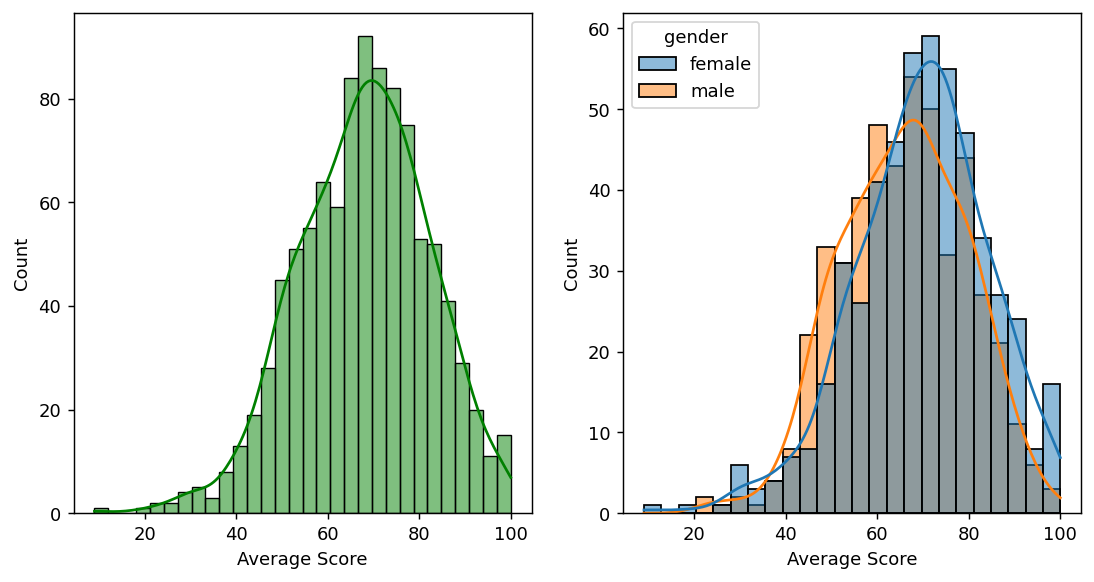

In [32]:
fig, axs = plt.subplots(1,2, figsize = (10,5), dpi = 130)
plt.subplot(121)
sns.histplot(data=df, x = 'Average Score', bins = 30, kde= True, color= 'g');
plt.subplot(122)
sns.histplot(data=df, x = 'Average Score',kde= True, hue= 'gender');

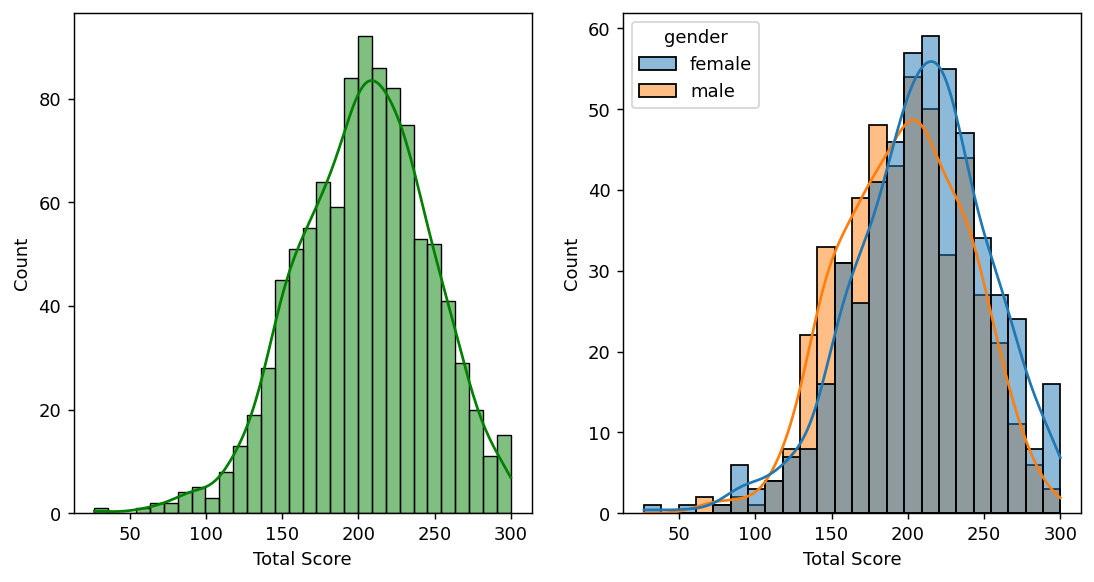

In [33]:
fig, axs = plt.subplots(1,2, figsize = (10,5), dpi = 130)
plt.subplot(121)
sns.histplot(data=df, x = 'Total Score', bins = 30, kde= True, color= 'g');
plt.subplot(122)
sns.histplot(data=df, x = 'Total Score',kde= True, hue= 'gender');

#### Female students tend to perform better than the male students

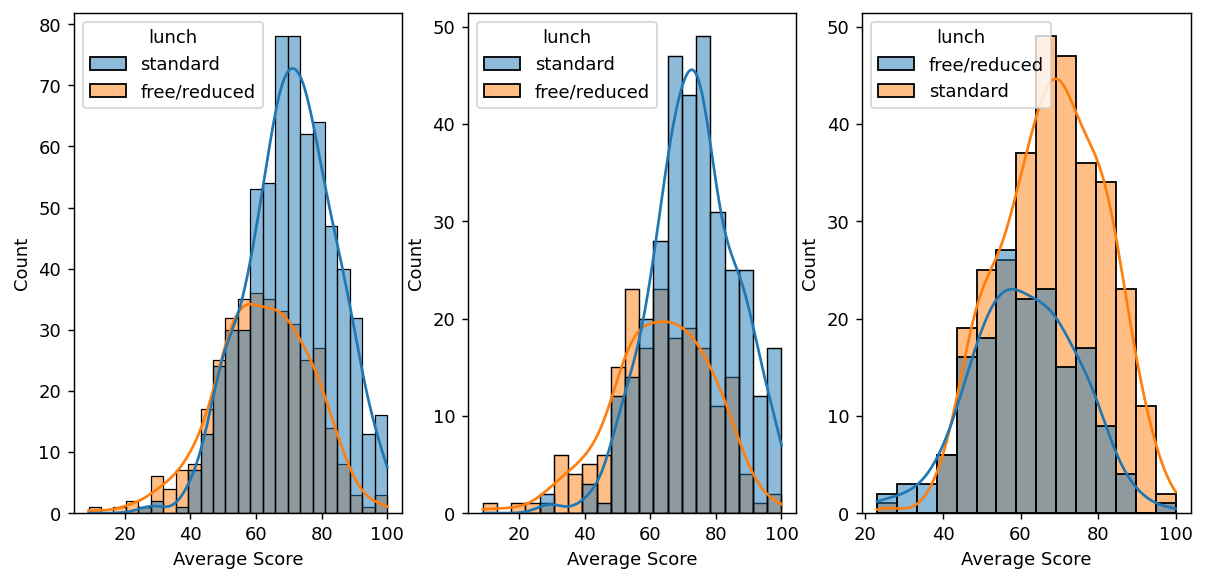

In [40]:
fig, axs = plt.subplots(1,3, figsize = (15,5), dpi = 130)
plt.subplot(141)
sns.histplot(data=df, x = 'Average Score', kde= True, hue='lunch');
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x = 'Average Score',kde= True, hue= 'lunch');
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x = 'Average Score',kde= True, hue= 'lunch');

* Standard lunch helps student perform better in exam for both male and female.

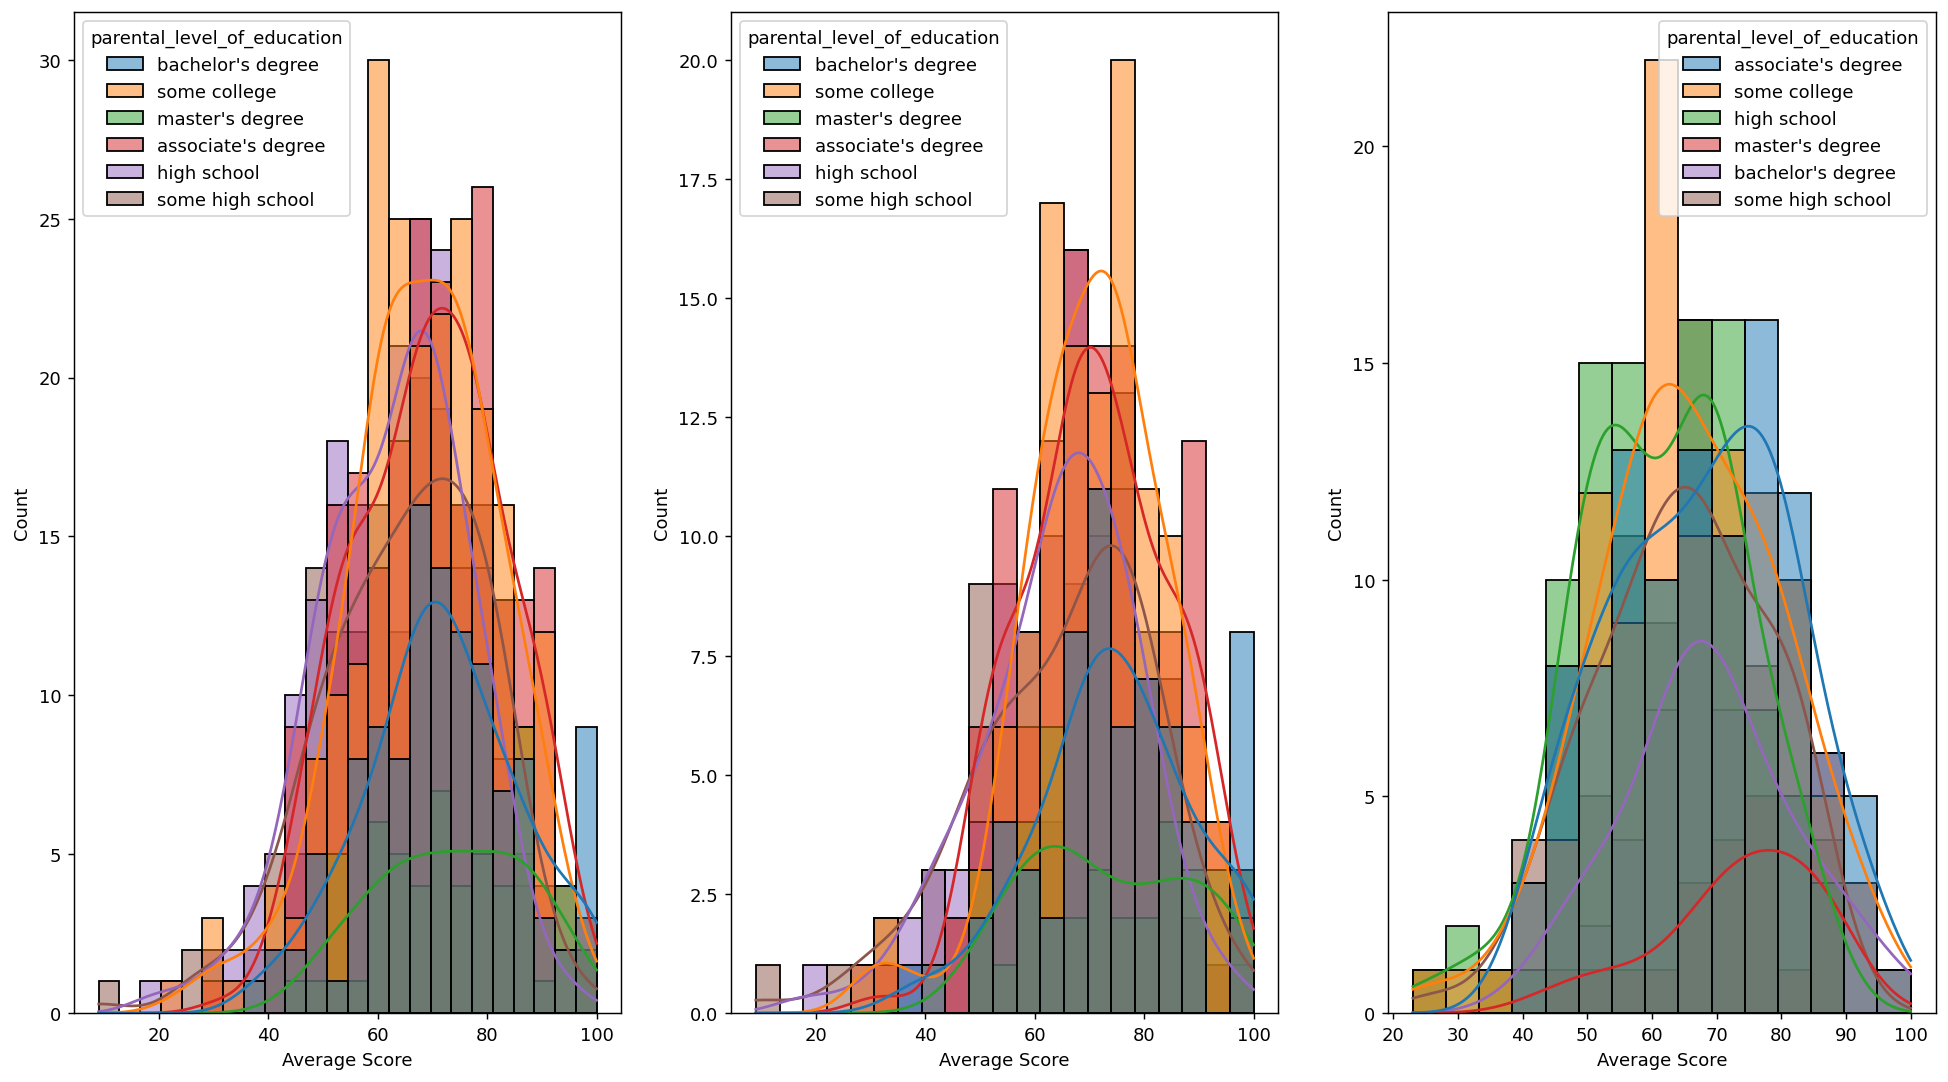

In [43]:
fig, axs = plt.subplots(1,3, figsize = (25,10), dpi = 130)
plt.subplot(141)
sns.histplot(data=df, x = 'Average Score', kde= True, hue='parental_level_of_education');
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x = 'Average Score',kde= True, hue= 'parental_level_of_education');
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x = 'Average Score',kde= True, hue= 'parental_level_of_education');

* Parental level of education does not influence student's performance in the exam

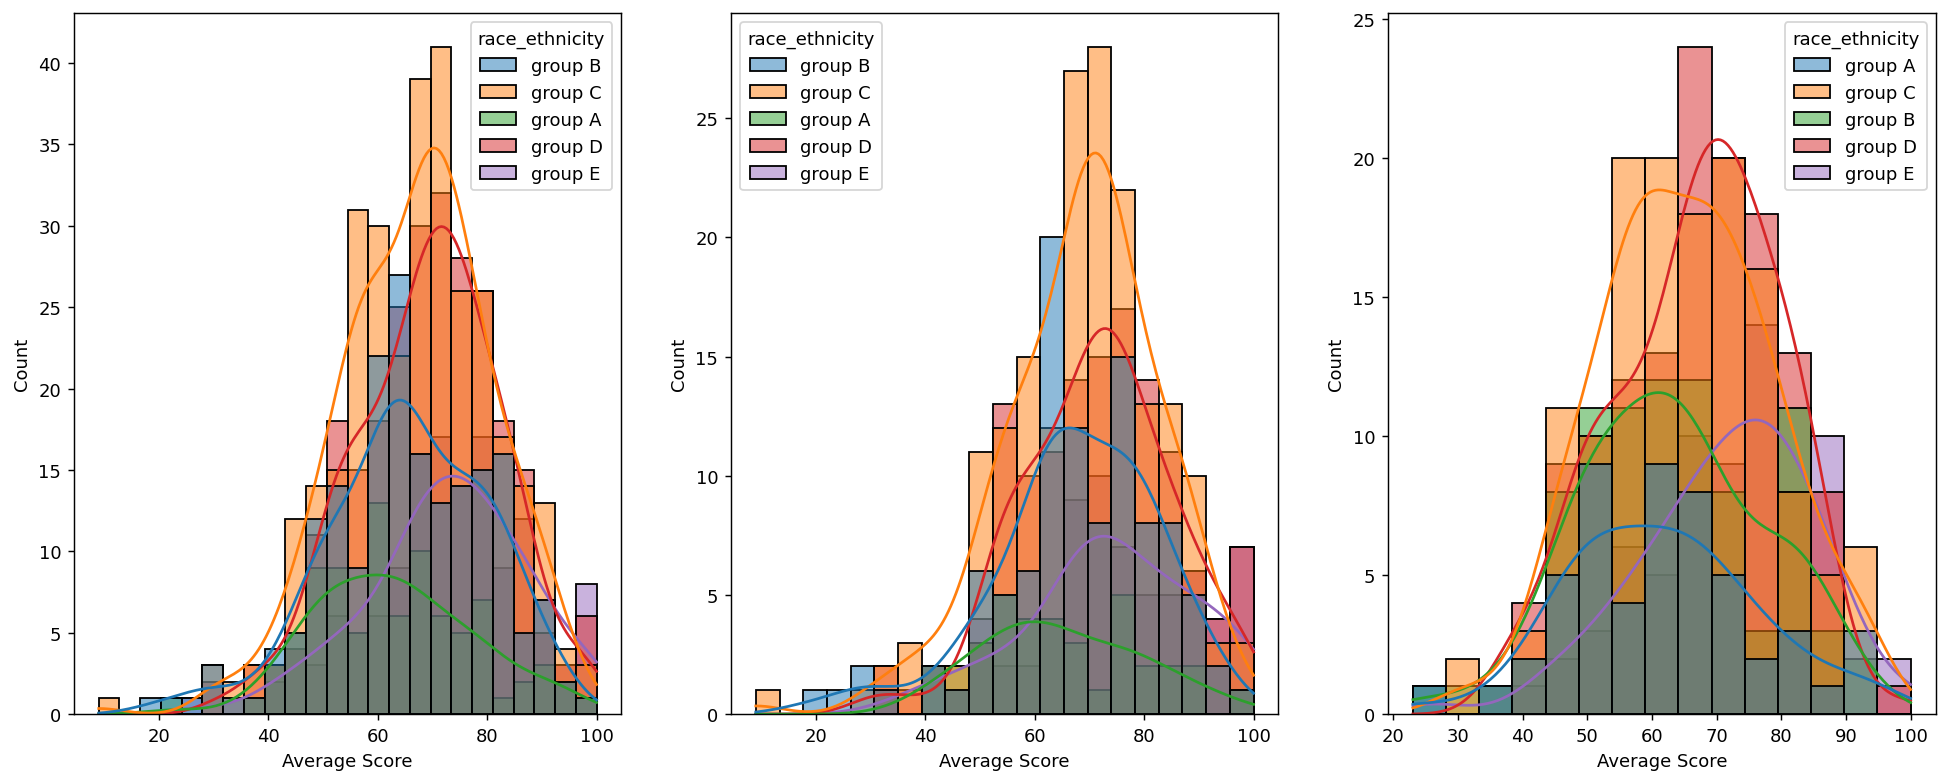

In [45]:
fig, axs = plt.subplots(1,3, figsize = (25,7), dpi = 130)
plt.subplot(141)
sns.histplot(data=df, x = 'Average Score', kde= True, hue='race_ethnicity');
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x = 'Average Score',kde= True, hue= 'race_ethnicity');
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x = 'Average Score',kde= True, hue= 'race_ethnicity');

* Students from race_ethnicity Group A and Group B are poor in studies for both male and female.
* Students belonging to Group D and E are better than other race_ethnicity groups.

### Maximum score of students in all three subjects

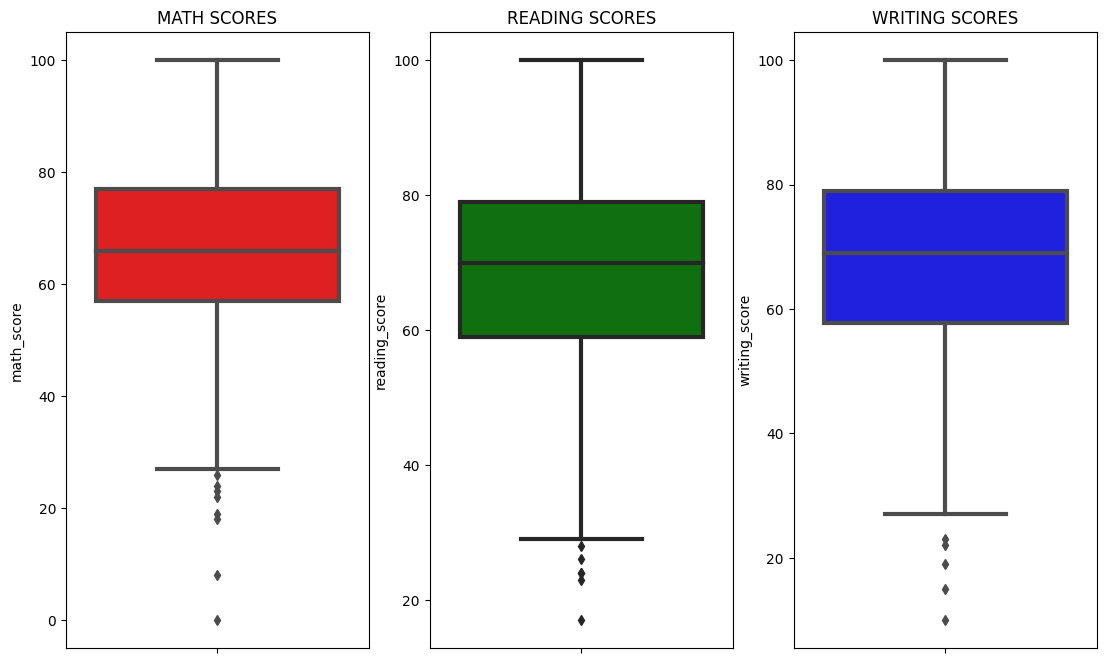

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()



* From the charts it  is clear that most of the students score between 60-80 in all three subjects

### Multivariate analysis using pieplot

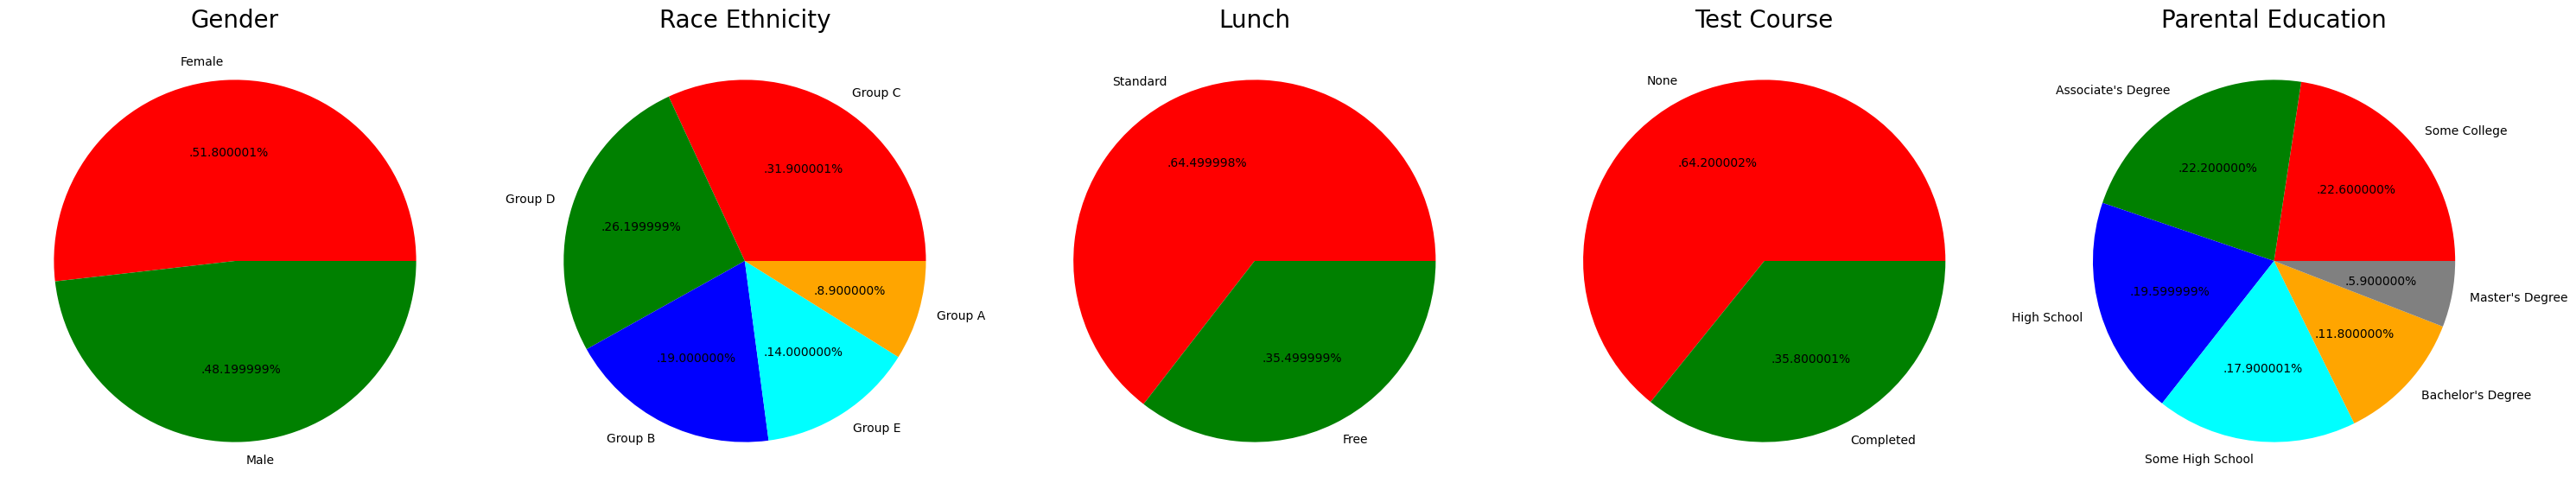

In [55]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### From the charts it can be concluded that : 
* Number of male and females are equal
* Most student belong to Race/Ethnicity Group C
* Number of students having standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater.
* Most parents have an Associate's degree or some college degree followed by the other degrees.

## Feature wise Visualization

### Gender

#### Univariate Analysis

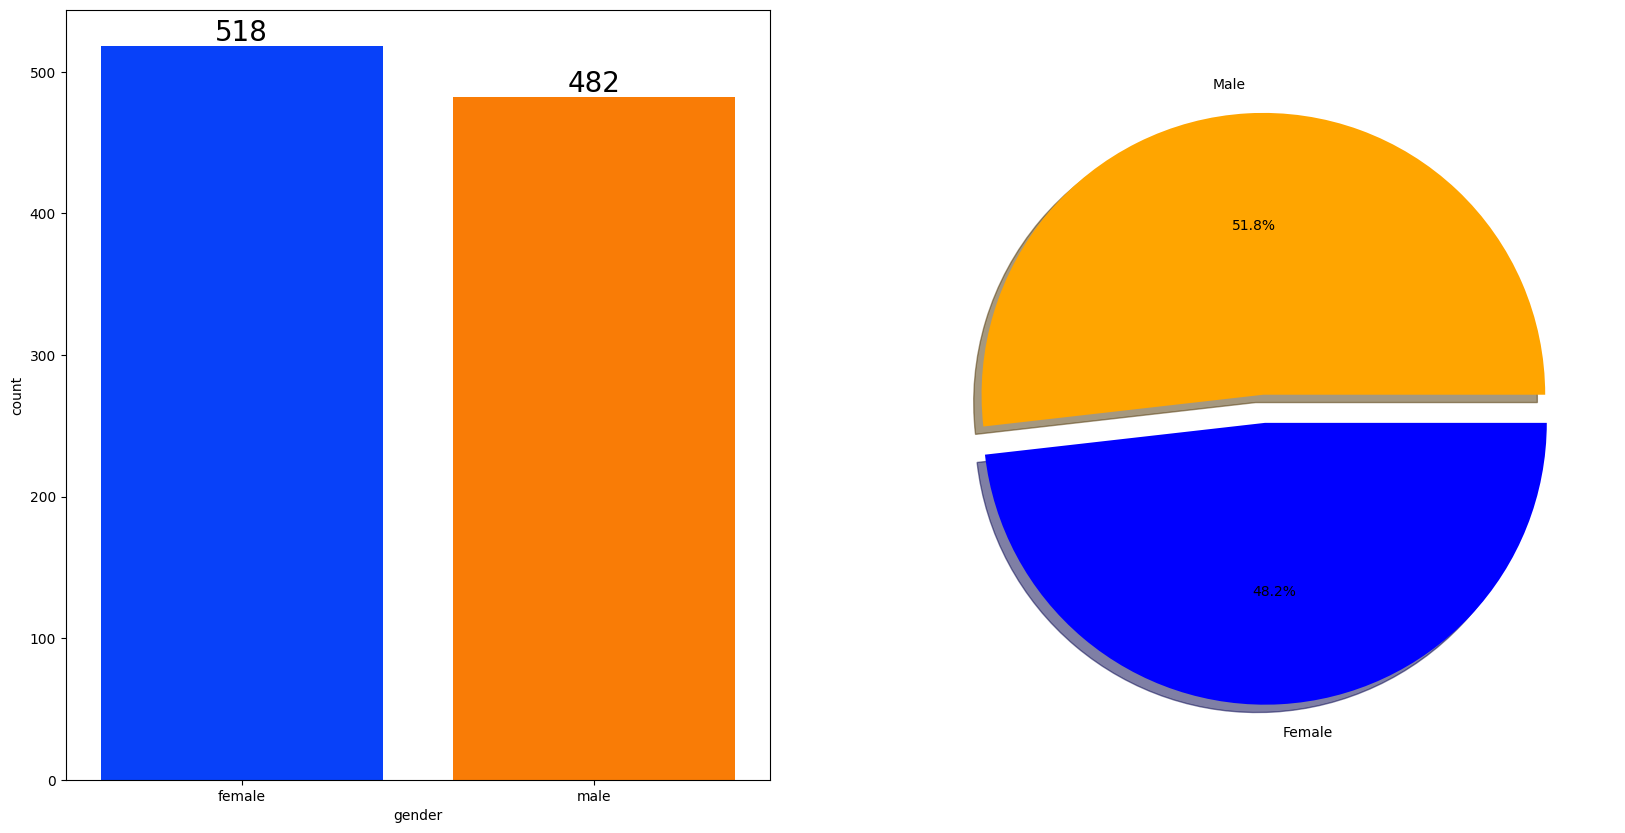

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['orange','blue'])
plt.show()

* We have a balanced data for the Gender with 51.8% Male and 48.2% Female.

#### Bivariate Analysis

In [72]:
gender_group = df[['gender','math_score', 'reading_score','writing_score', 'Total Score', 'Average Score']].groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total Score,Average Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


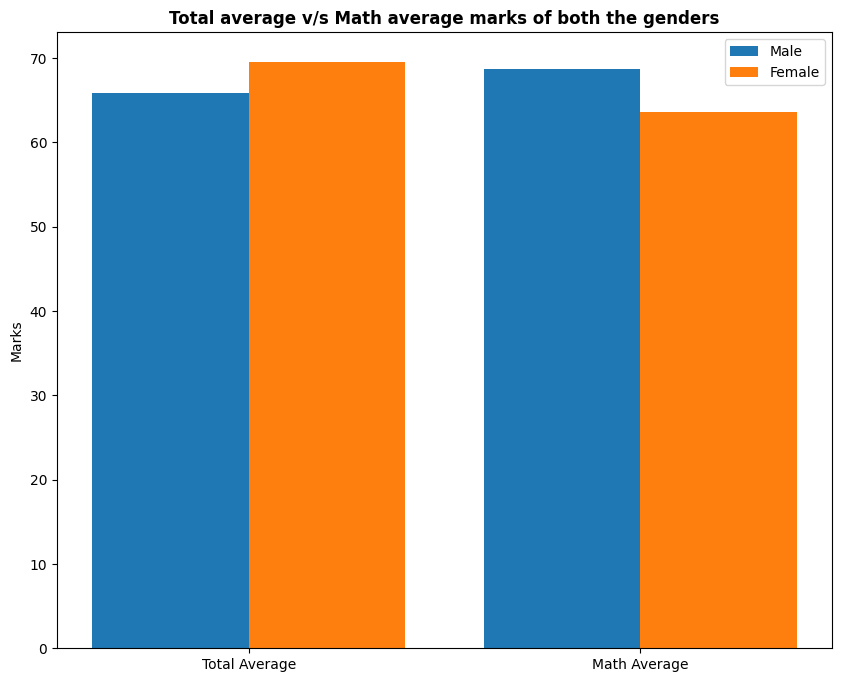

In [73]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average Score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average Score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

* Females have a better average score than male.
* Males have better average score in Maths than Female.

### Race / Ethnicity

#### Univariate Analysis

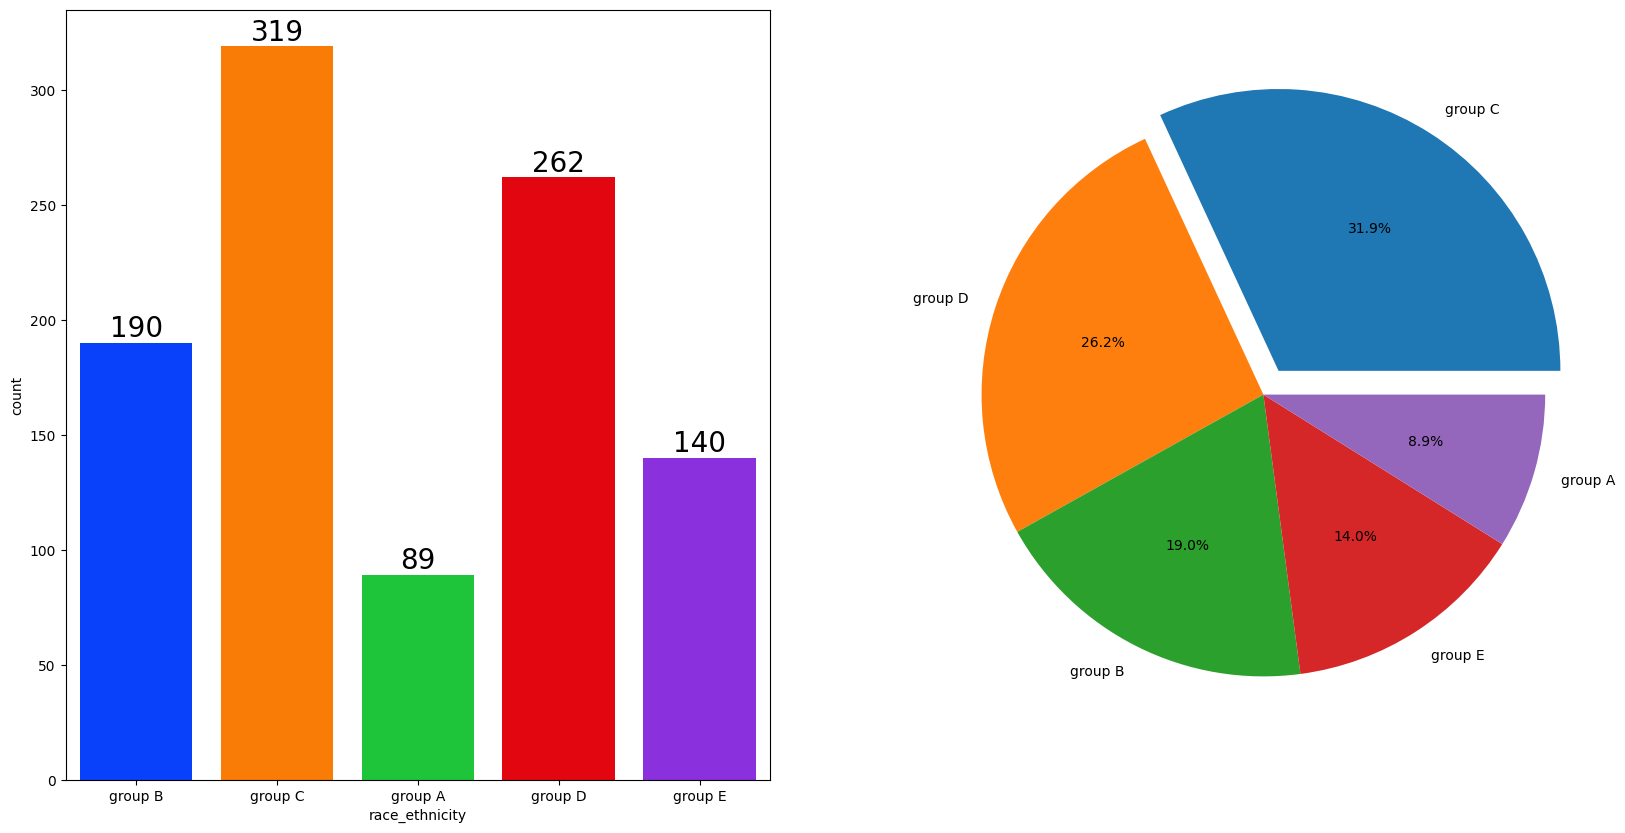

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=False)
plt.show()   


* Most students belong to Group C followed by Group D
* Group A have the least number of students

#### Bivariate Analysis

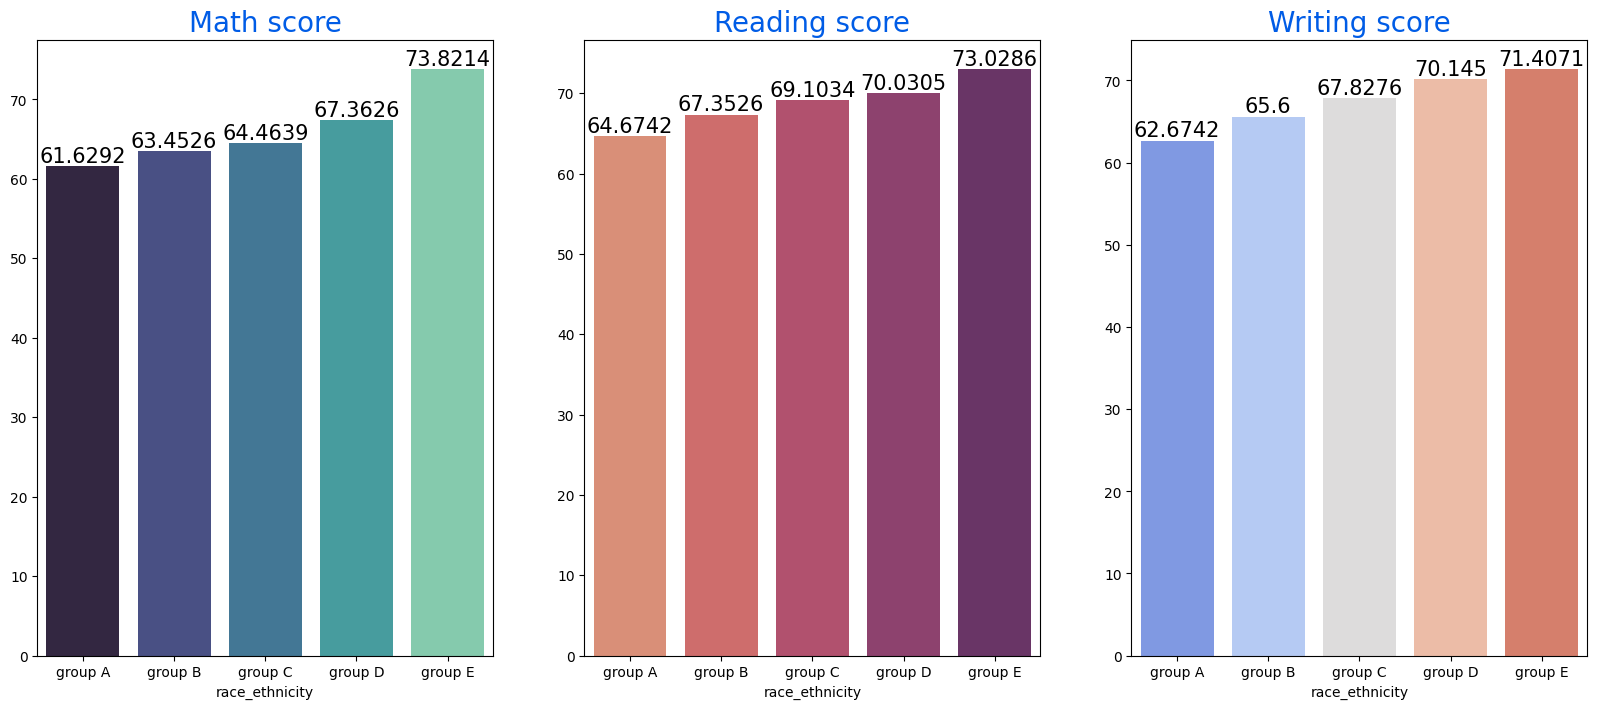

In [85]:
Group_data2 = df[['race_ethnicity','math_score', 'reading_score','writing_score', 'Total Score', 'Average Score']].groupby('race_ethnicity').mean()

# Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].index,y=Group_data2['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].index,y=Group_data2['reading_score'].values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].index,y=Group_data2['writing_score'].values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)



* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

### PARENTAL LEVEL OF EDUCATION COLUMN

#### Univarate Analysis

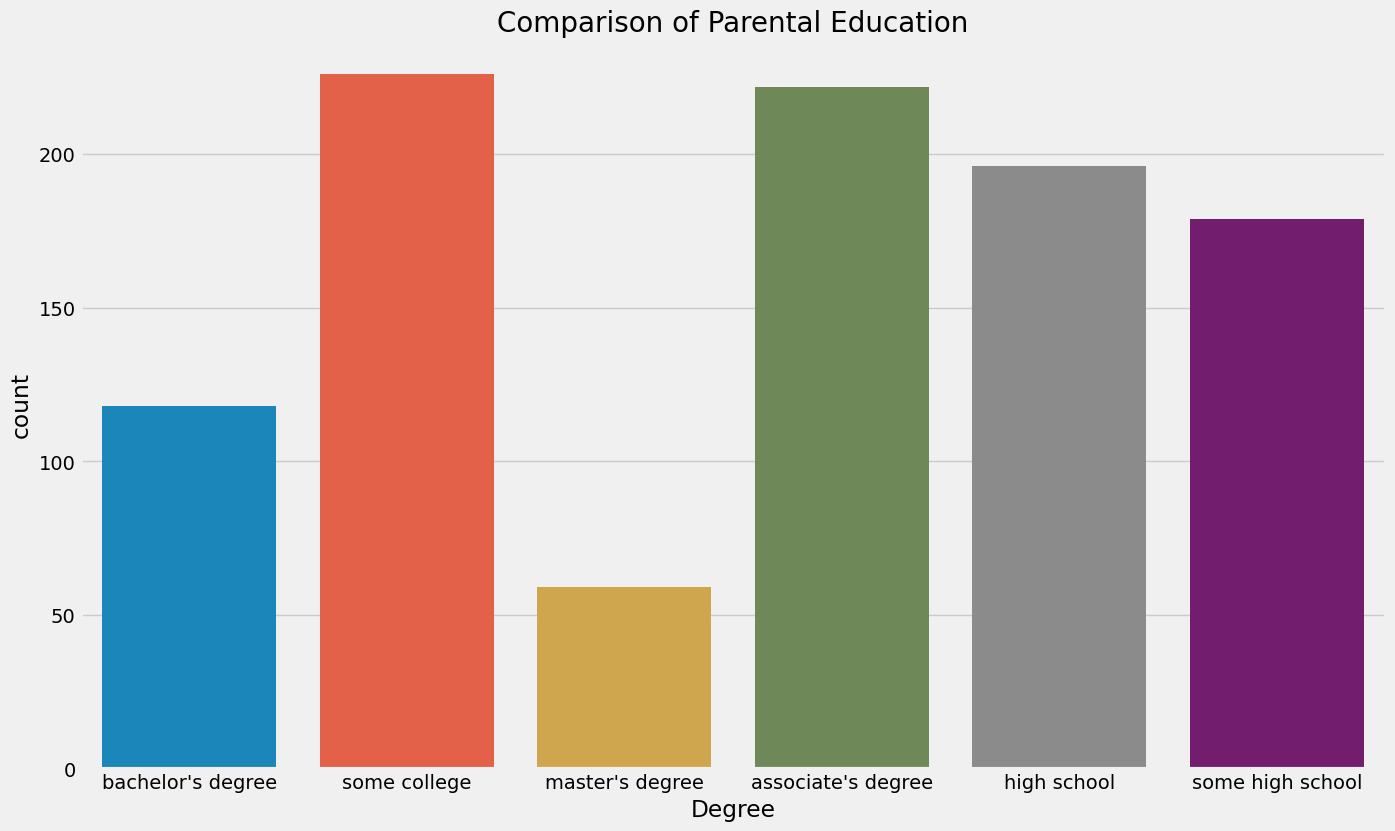

In [99]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x = 'parental_level_of_education',data=df)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


* Largest number of students are from 'some college' or having a college degree.

### Bivariate Analysis

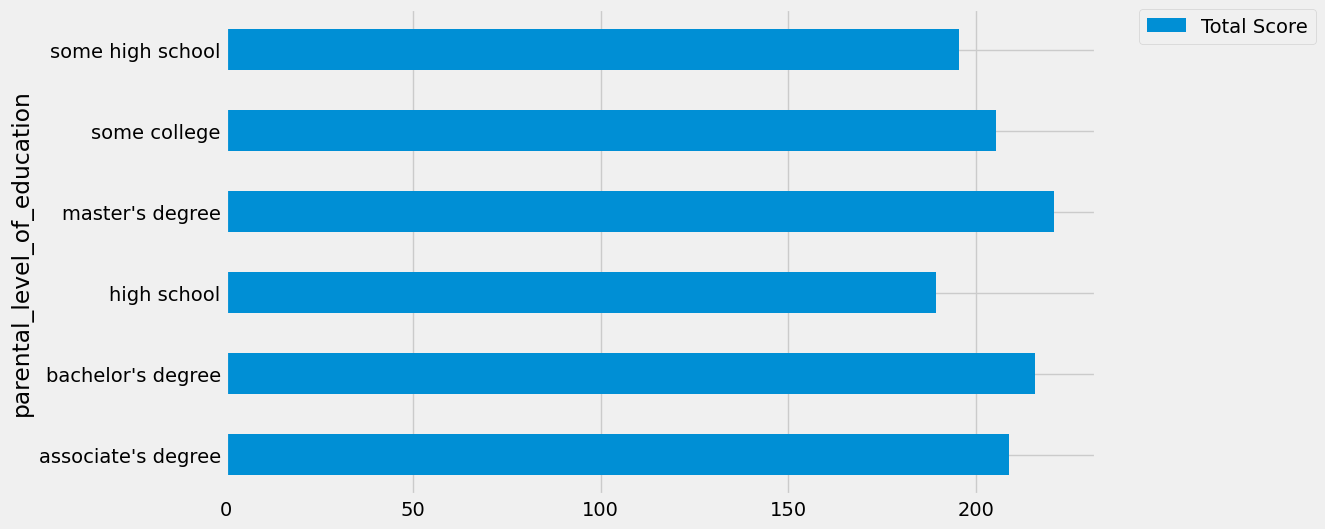

In [102]:
df[['parental_level_of_education','Total Score']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Students whose parents have a master's degree has highest total score

### Lunch

#### Univariate Analysis

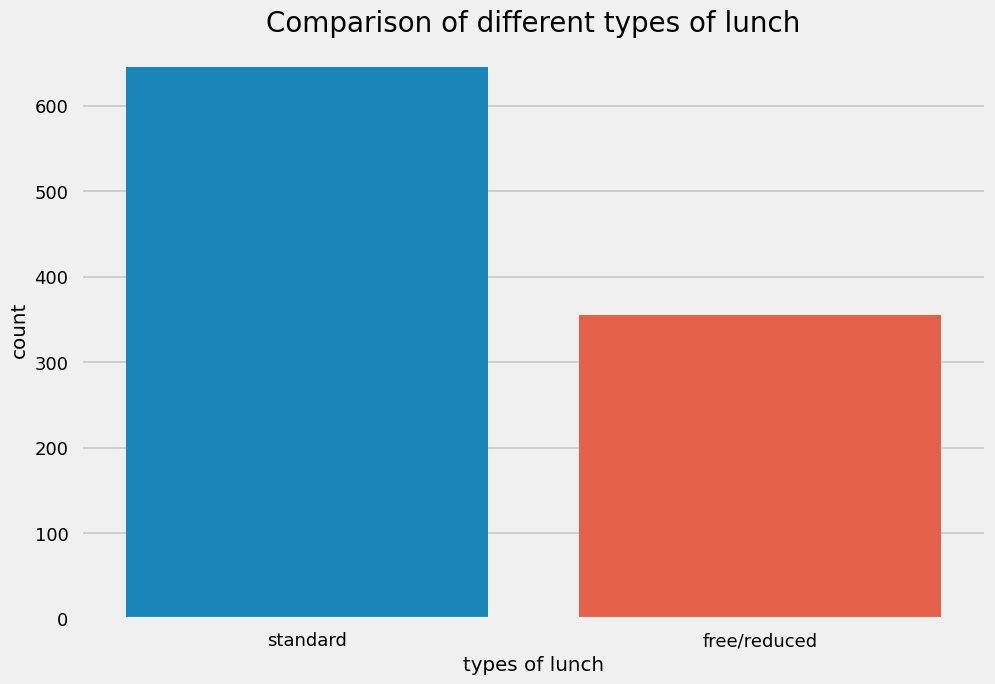

In [104]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x='lunch',data=df)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


* Students being served Standard lunch was more than free lunch

#### Bivariate Analysis

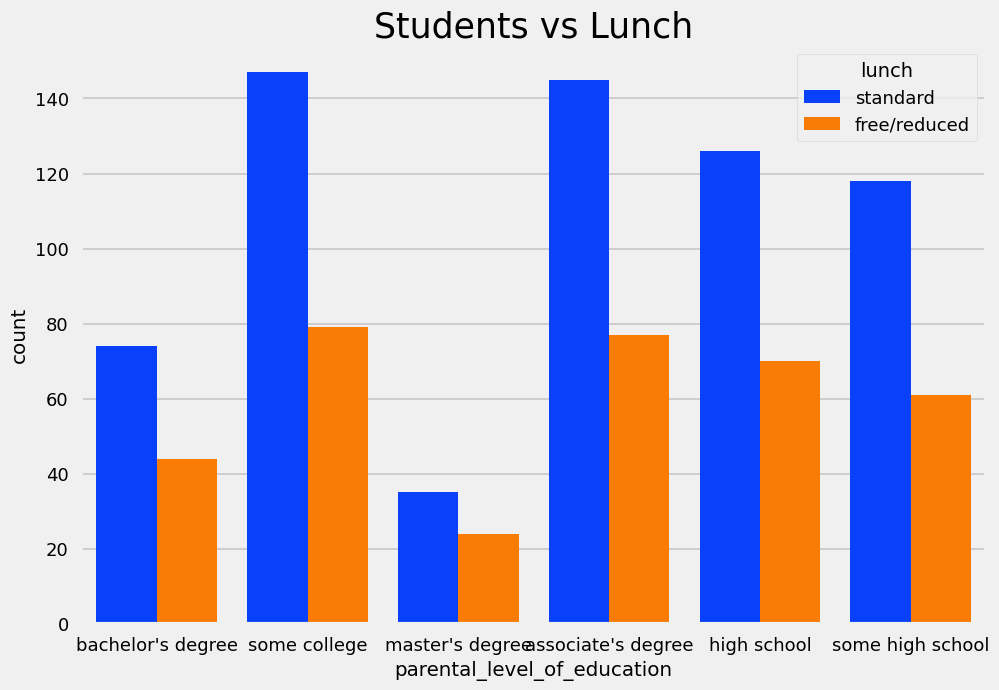

In [113]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x='parental_level_of_education',data=df,palette = 'bright',hue='lunch',saturation=0.95);
plt.title('Students vs Lunch',color='black',size=25);

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### Test Preparation Course

#### Bivariate Analysis

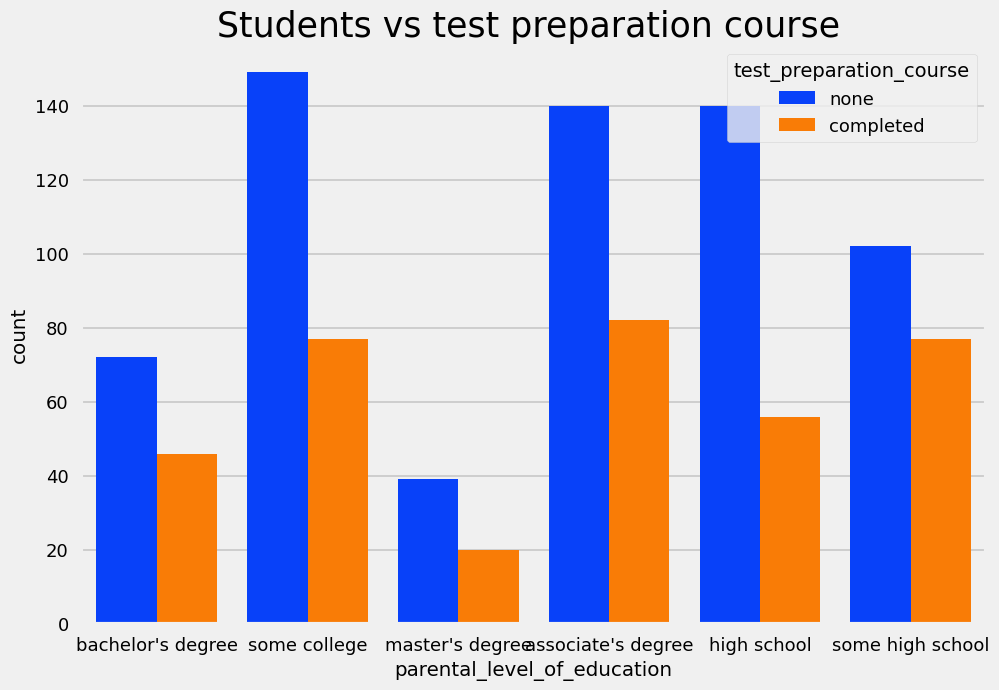

In [118]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x='parental_level_of_education',data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95);
plt.title('Students vs test preparation course ',color='black',size=25);

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Checking outliers

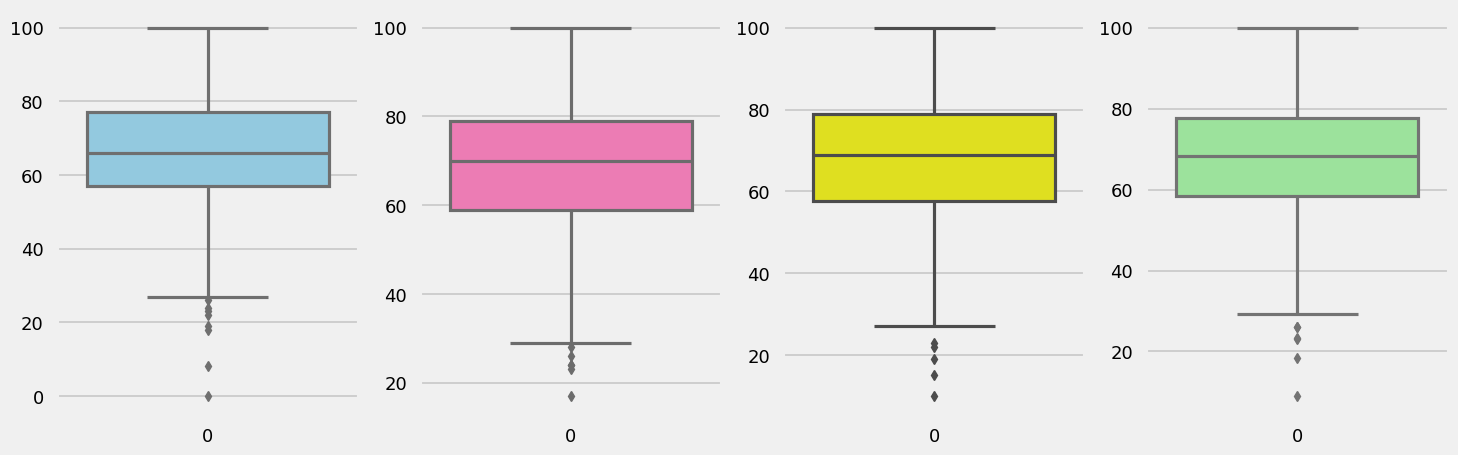

In [119]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')
plt.show()


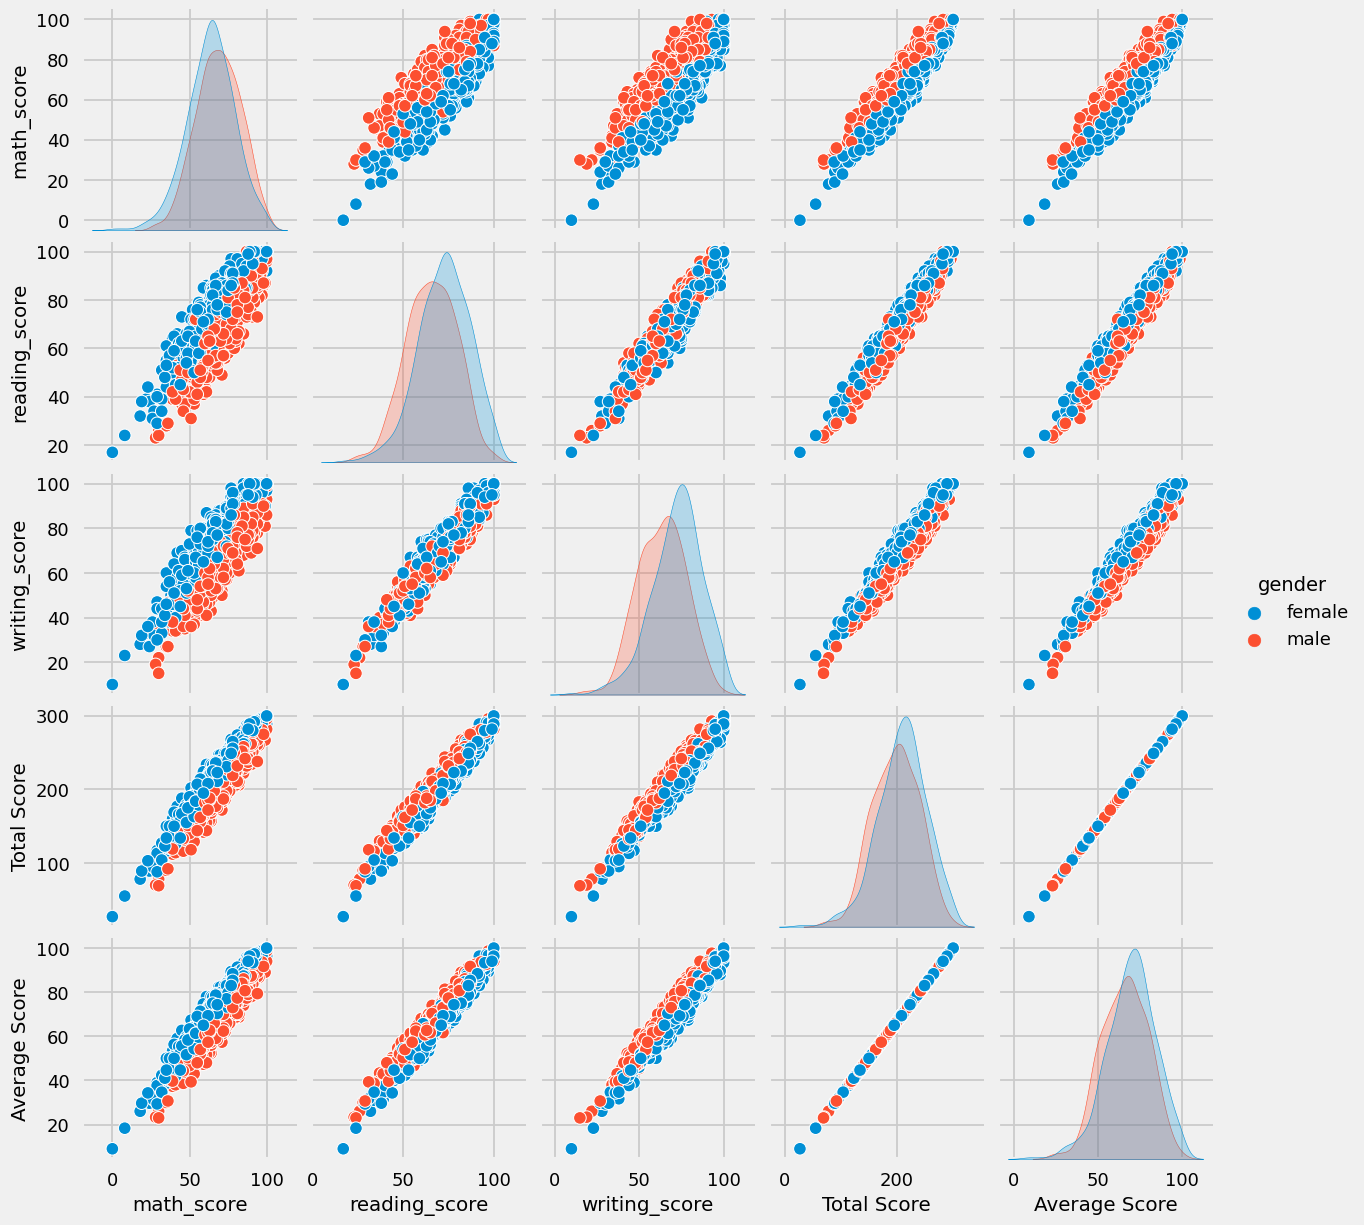

In [120]:
sns.pairplot(df,hue = 'gender')
plt.show()

* From the above plot it is clear that all the scores increase linearly with each other.

## Conclusion


* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.
